In [ ]:
# Title: Shopper Spectrum: Customer Segmentation and Product Recommendations

In [ ]:
# Contribution: Individual
# by Suzi Sharma

In [ ]:
GitHub Link: https://github.com/SuziSharma2/Shopper-Spectrum-Customer-Segmentation-and-Product-Recommendations

In [ ]:
#  Problem Statement
# The global e-commerce industry generates massive volumes of transactional data daily. This data holds valuable insights into customer purchase
# behavior, preferences, and trends. However, most businesses underutilize this data due to a lack of proper analysis and segmentation.

# This project aims to address two key challenges:
# 1. Customer Segmentation – by analyzing Recency, Frequency, and Monetary (RFM) values of each customer to group them into actionable clusters.
# 2. Product Recommendation – by implementing an item-based collaborative filtering system that suggests products based on purchase history.

# Through these components, the project empowers e-commerce platforms to enhance personalization, improve retention, and boost sales using data-driven
# decision-making.


In [ ]:
# Project Summary 
# The e-commerce sector thrives on data. Every product viewed, purchased, or abandoned in a cart contributes to a goldmine of behavioral data that,
# when analyzed effectively, can transform customer experiences and business strategies. In this project, titled Shopper Spectrum: Customer 
# Segmentation and Product Recommendations, we leverage real-world online retail data to build an end-to-end machine learning solution that enhances
# personalization and customer understanding in an e-commerce environment.

# We start by collecting and exploring the dataset, which includes invoice-level transaction records from a UK-based online retail store. The dataset
# contains key fields such as `InvoiceNo`, `CustomerID`, `InvoiceDate`, `StockCode`, `Quantity`, `UnitPrice`, and `Country`. The goal is to use this 
# transactional data to uncover patterns in purchasing behavior.

# The first step involved data cleaning and preprocessing. We removed records with missing `CustomerID`, negative `Quantity` or `UnitPrice`, and
# cancelled orders (indicated by invoice numbers starting with 'C'). After ensuring data quality, we calculated the total transaction value using 
# `Quantity  UnitPrice`, preparing the dataset for analysis.

# In the Exploratory Data Analysis (EDA) stage, we visualized important patterns such as the top-selling products, transaction volumes by country,
# monthly sales trends, and customer spending behavior. We observed that most transactions were concentrated in the UK, and that certain low-cost 
# decorative items were extremely popular. We also noted a high concentration of smaller purchases, indicating a largely B2C business model.

# Next, we moved into RFM Analysis — a powerful customer segmentation technique based on:
# - Recency: How recently a customer made a purchase
# - Frequency: How often they purchase
# - Monetary: How much they spend

# Using these three metrics, we created a normalized RFM dataset and applied the KMeans clustering algorithm to group customers into clusters. The
# optimal number of clusters was chosen using the Elbow Method and validated with Silhouette Scores. The resulting segments were labeled based
# on behavioral characteristics:
# - High-Value Customers: Frequent and recent buyers with high spending
# - Regular Customers: Moderate in frequency and spending
# - Occasional Buyers: Low frequency and spend
# - At-Risk Customers: High recency, low frequency, and low spend

# To support personalized product suggestions, we built an item-based collaborative filtering system. Using a customer-product matrix, we 
# calculated cosine similarity between products to identify items often purchased together. This allowed us to return the top 5 most similar items 
# when a user enters a product name or ID.

# Finally, we deployed the models into a Streamlit app featuring two modules:
# 1. Customer Segmentation Module – Users input Recency, Frequency, and Monetary values to predict which segment a customer falls into.
# 2. Product Recommendation Module – Users input a product name to get 5 similar products based on historical purchasing patterns.

# The project highlights the power of unsupervised learning, feature engineering, and collaborative filtering in real-world business 
# scenarios. It showcases how businesses can:
# -  Run targeted campaigns for high-value or at-risk customers
# -  Reduce churn through timely engagement
# -  Drive more sales with personalized product suggestions
# -  Use insights to optimize inventory and pricing strategies

# This project is a practical example of how data science can unlock the full potential of customer data in the e-commerce industry. By combining EDA,
# machine learning, web deployment, we have built a scalable and insightful analytics tool that can support both marketing and operational decisions.


In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn streamlit

  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 5.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.0 MB 3.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.0 MB 3.0 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.0 MB 2.6 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.0 MB 3.3 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.0 MB 3.4 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/11.0 MB 3.4

In [3]:
!pip install matplotlib


In [6]:
pip install seaborn pandas numpy scikit-learn streamlit joblib

     -------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 8.9/8.9 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 307.7/307.7 kB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 225.2/225.2 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB ? eta 0:00:00
     ---------------------------------------- 111.1/111.1 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [ ]:
# Import libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load Dataset

In [15]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Edureka\shopper-spectrum\data\online_retail.csv", encoding='ISO-8859-1')  # Replace with your dataset path
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Data Cleaning

In [16]:
# Remove missing Customer IDs
df.dropna(subset=["CustomerID"], inplace=True)

# Remove cancelled invoices
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

# Remove non-positive quantity and price
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [ ]:
# Exploratory Data Analysis

In [ ]:
 # Data Overview

In [21]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.4+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Univariate Analysis
# 1. Top 10 Countries by Transactions

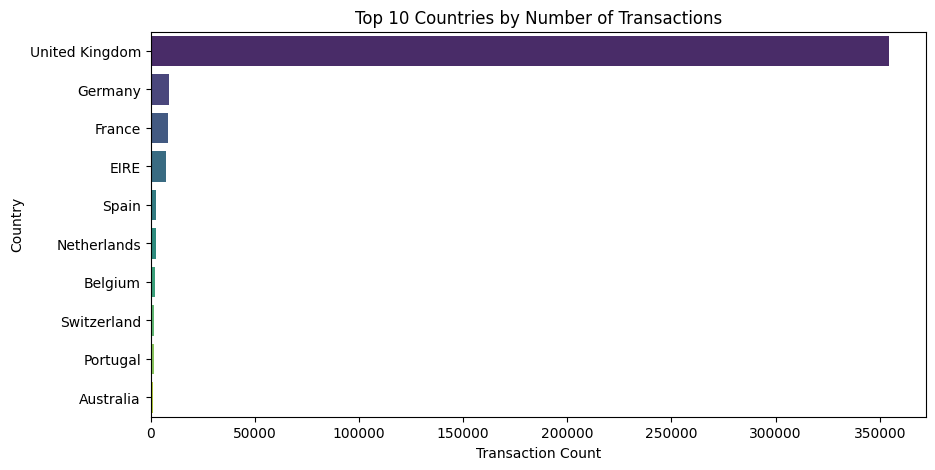

In [22]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Transaction Count')
plt.ylabel('Country')
plt.show()

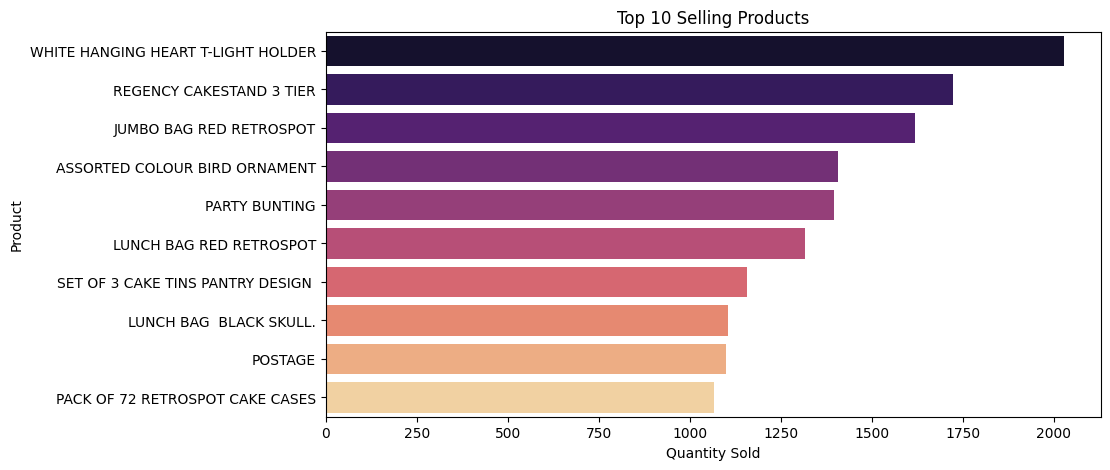

In [23]:
# 2. Top 10 Selling Products
top_products = df['Description'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

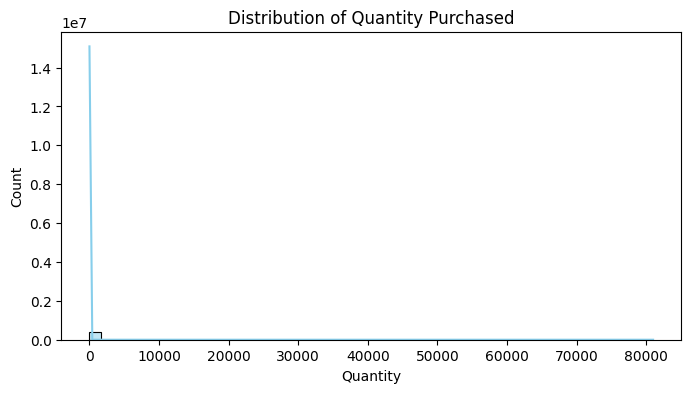

In [24]:
# 3. Distribution of Quantity Purchased
plt.figure(figsize=(8,4))
sns.histplot(df['Quantity'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Quantity Purchased')
plt.xlabel('Quantity')
plt.show()

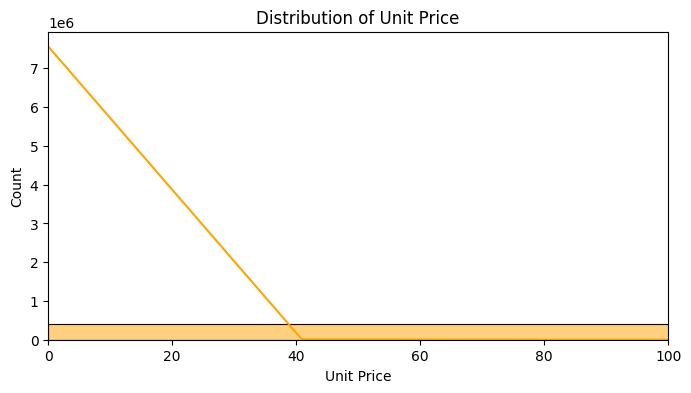

In [25]:
# 4. Distribution of Unit Price
plt.figure(figsize=(8,4))
sns.histplot(df['UnitPrice'], bins=50, kde=True, color='orange')
plt.xlim(0, 100)  # Limiting extreme outliers
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.show()

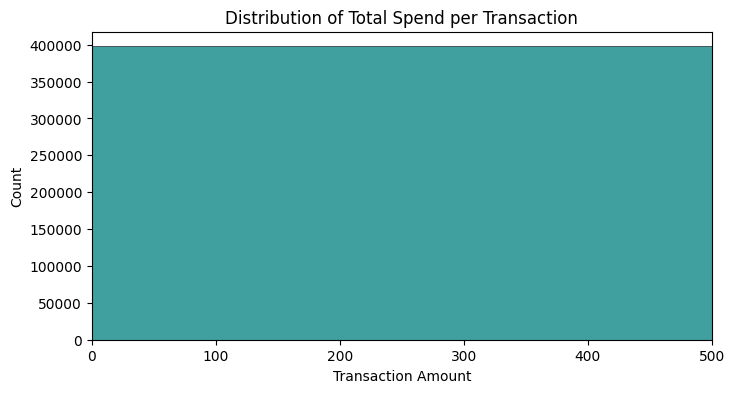

In [26]:
# 5. Total Spend per Transaction
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
plt.figure(figsize=(8,4))
sns.histplot(df['TotalAmount'], bins=100, color='teal')
plt.xlim(0, 500)  # Limit for clarity
plt.title('Distribution of Total Spend per Transaction')
plt.xlabel('Transaction Amount')
plt.show()

In [ ]:
# Bivariate Analysis
# 6. Time Series – Monthly Sales Trend

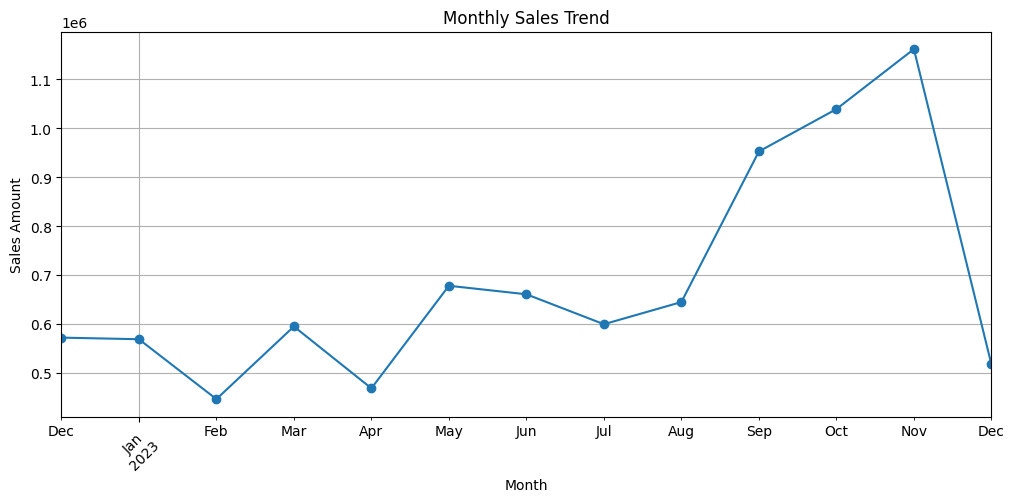

In [27]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalAmount'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales Amount")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

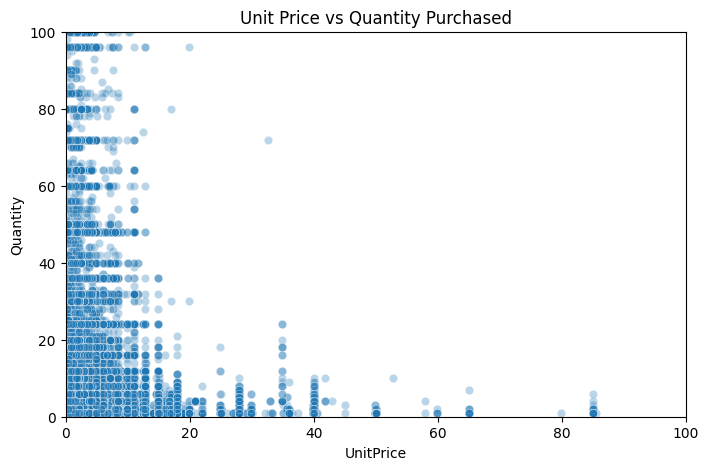

In [28]:
# 7. Quantity vs Unit Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='UnitPrice', y='Quantity', alpha=0.3)
plt.title("Unit Price vs Quantity Purchased")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

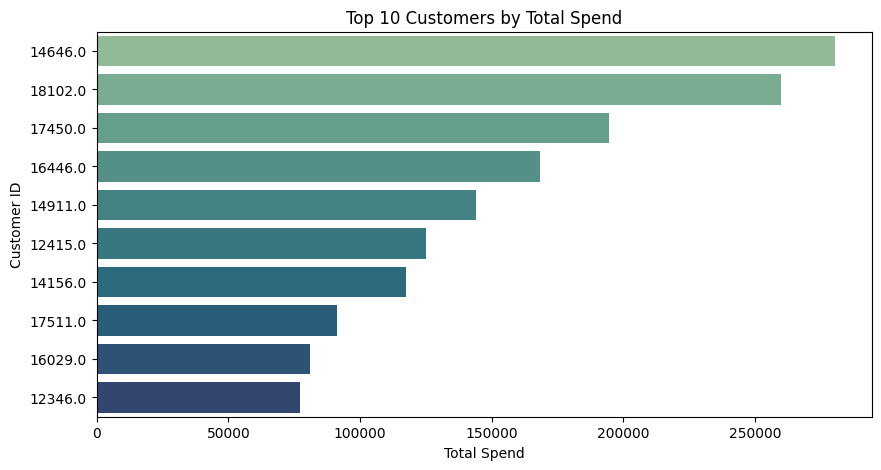

In [29]:
# 8. Top Customers by Spend
top_customers = df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette="crest")
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Total Spend")
plt.ylabel("Customer ID")
plt.show()

In [ ]:
# Multivariate Analysis
# 9. RFM Distribution Heatmap

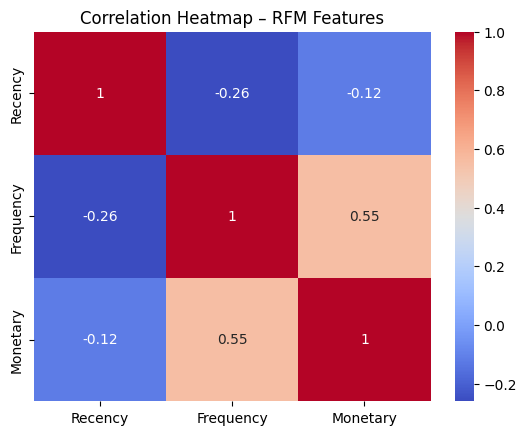

In [30]:
rfm_corr = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(rfm_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap – RFM Features")
plt.show()

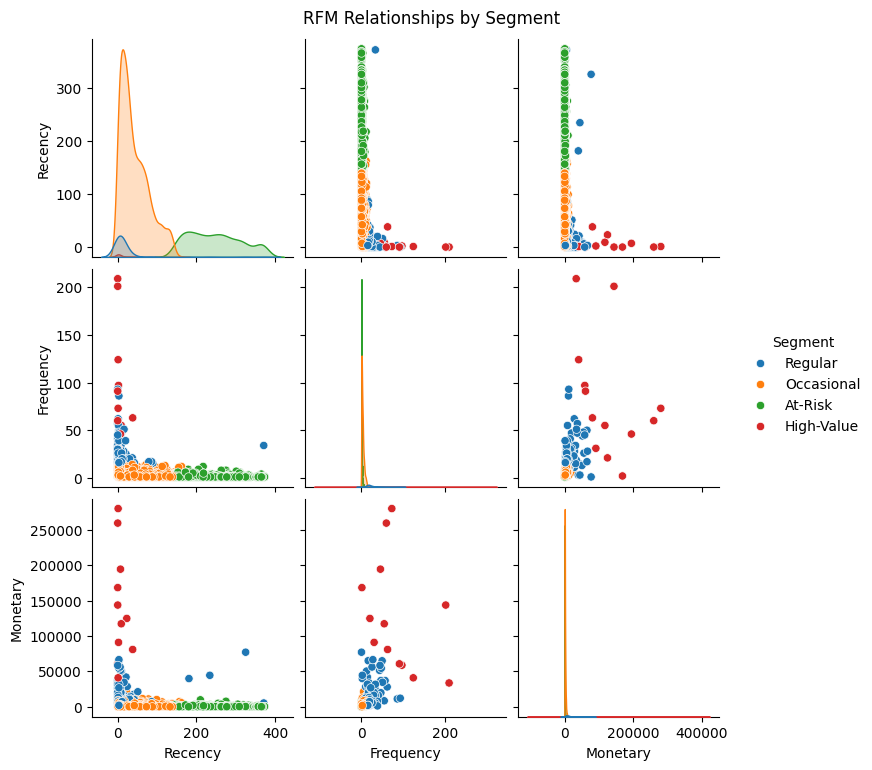

In [31]:
# 10. RFM Pairplot
sns.pairplot(rfm, vars=['Recency', 'Frequency', 'Monetary'], hue='Segment')
plt.suptitle('RFM Relationships by Segment', y=1.02)
plt.show()

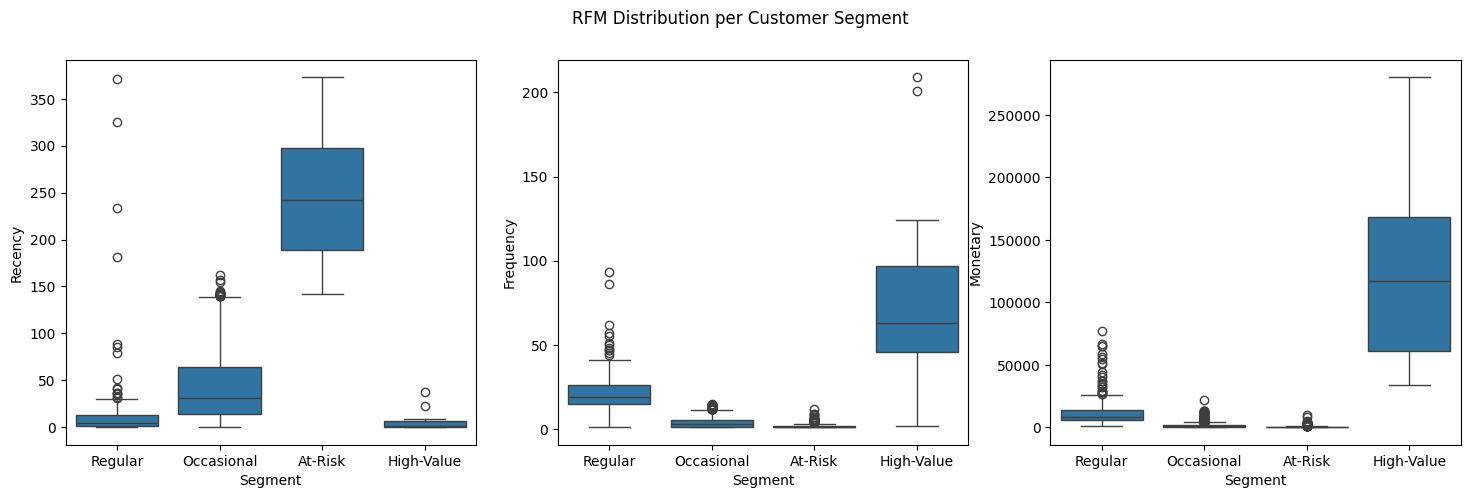

In [32]:
# 11. RFM Boxplots by Cluster
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.boxplot(x='Segment', y='Recency', data=rfm, ax=axes[0])
sns.boxplot(x='Segment', y='Frequency', data=rfm, ax=axes[1])
sns.boxplot(x='Segment', y='Monetary', data=rfm, ax=axes[2])
fig.suptitle("RFM Distribution per Customer Segment")
plt.show()

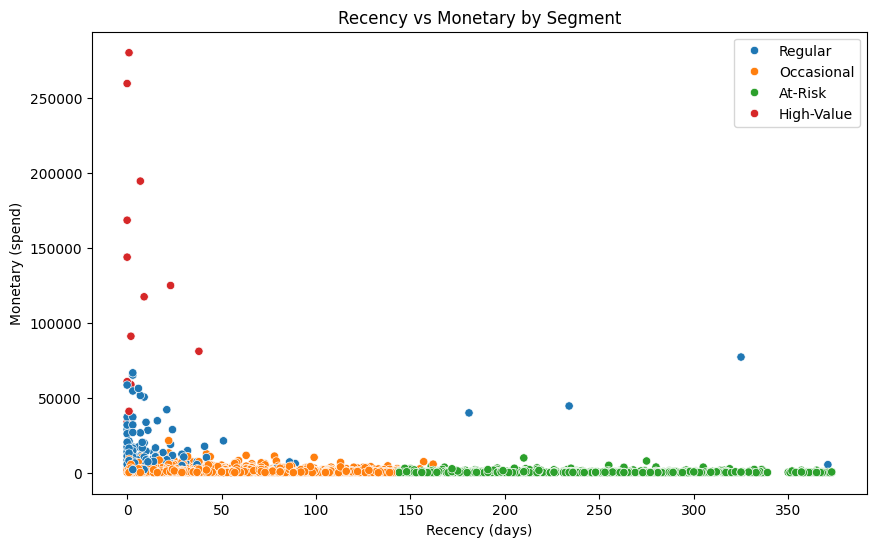

In [33]:
# 12. Cluster Scatter Plot (2D)
plt.figure(figsize=(10,6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Segment'], palette='tab10')
plt.title("Recency vs Monetary by Segment")
plt.xlabel("Recency (days)")
plt.ylabel("Monetary (spend)")
plt.legend()
plt.show()

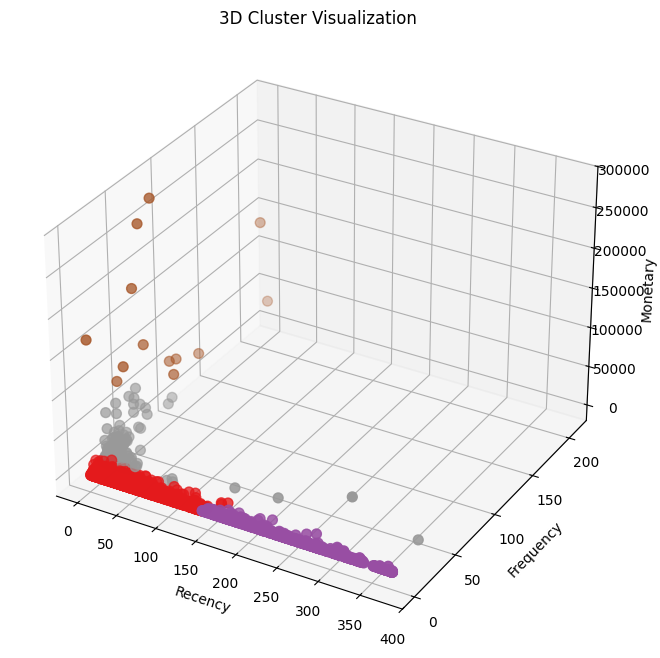

In [34]:
# 13. Cluster Scatter Plot (3D)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
                     c=rfm['Cluster'], cmap='Set1', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("3D Cluster Visualization")
plt.show()

In [ ]:
# RFM Feature Engineering

In [17]:
# Reference date for recency
ref_date = df["InvoiceDate"].max()

# RFM table
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (ref_date - x.max()).days,
    "InvoiceNo": "nunique",
    "Quantity": lambda x: (x * df.loc[x.index, "UnitPrice"]).sum()
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

In [ ]:
# RFM Normalization & Clustering

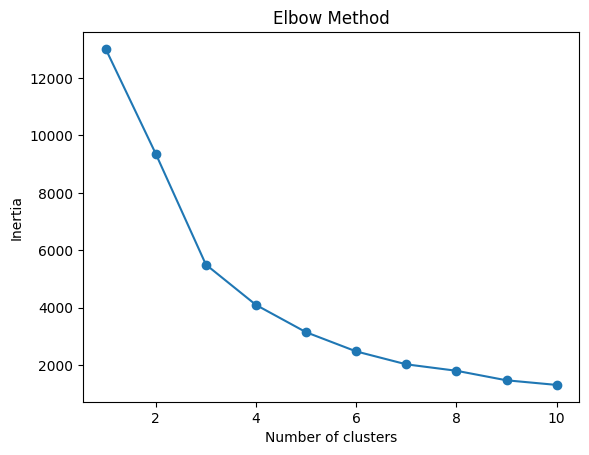

In [18]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Final Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

# Label clusters (manual interpretation)
def label_cluster(row):
    if row['Cluster'] == rfm.groupby('Cluster').mean().sort_values('Monetary', ascending=False).index[0]:
        return "High-Value"
    elif row['Cluster'] == rfm.groupby('Cluster').mean().sort_values('Monetary', ascending=False).index[1]:
        return "Regular"
    elif row['Cluster'] == rfm.groupby('Cluster').mean().sort_values('Monetary', ascending=False).index[2]:
        return "Occasional"
    else:
        return "At-Risk"

rfm["Segment"] = rfm.apply(label_cluster, axis=1)

In [ ]:
# Product Recommendation System

In [19]:
# Create pivot table: CustomerID vs StockCode
pivot = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)

# Cosine similarity between products
product_similarity = cosine_similarity(pivot.T)
product_sim_df = pd.DataFrame(product_similarity, index=pivot.columns, columns=pivot.columns)

def recommend_products(product_id, top_n=5):
    if product_id not in product_sim_df.index:
        return []
    similar_products = product_sim_df[product_id].sort_values(ascending=False).drop(product_id).head(top_n)
    return similar_products.index.tolist()

In [ ]:
# Save Models

In [40]:
import os

os.makedirs("../models", exist_ok=True)

joblib.dump(kmeans, "../models/kmeans_rfm_model.pkl")
joblib.dump(scaler, "../models/rfm_scaler.pkl")
product_sim_df.to_pickle("../models/product_similarity.pkl")

In [ ]:
# ##  Conclusion

# In this project, we explored customer transaction data from an e-commerce platform to extract meaningful business insights and implement intelligent
# solutions. The workflow included:

# -  Cleaning and preprocessing the dataset to remove missing, cancelled, and invalid records.
# -  Performing Exploratory Data Analysis (EDA) to uncover trends in customer behavior, product sales, and spending patterns.
# -  Calculating **RFM (Recency, Frequency, Monetary)** scores and using **KMeans clustering** to segment customers into actionable categories 
#      such as:
#   - High-Value
#   - Regular
#   - Occasional
#   - At-Risk
# -  Building a **product recommendation system** using item-based collaborative filtering with cosine similarity to suggest relevant products
#      based on purchase history.
# -  Saving trained models and similarity matrices for deployment and building a **Streamlit dashboard** for real-time interaction.

# ## Business Impact

# -  Targeted marketing campaigns based on customer segments
# -  Retention strategies for at-risk customers
# -  Personalized recommendations to improve user experience
# - Improved product visibility and inventory planning

# This end-to-end project demonstrates the practical application of unsupervised learning and recommendation systems in solving real-world e-commerce
# problems.